In [1]:
from definitions import Nomino

nominos = Nomino.from_json('../data/parsed.json')

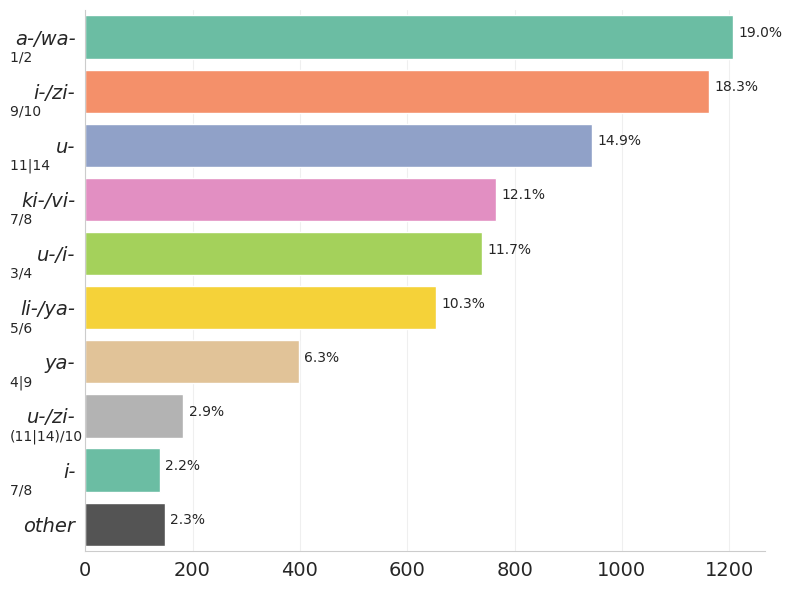

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter


sns.set_style("whitegrid")  # Optional: Set a style for the plot
palette = sns.color_palette('Set2', 9)
palette = [*palette, (0.33, 0.33, 0.33)]

counter = Counter([n.subject_concord for n in nominos])
keys, values = zip(*sorted([(k, v) for k, v in counter.items() if v > 80], key=lambda x:x[1], reverse=True))
clses = ['1/2', '9/10', '11|14', '7/8', '3/4', '5/6', '4|9', '(11|14)/10', '7/8']
clses = [c + ' ' * (max(map(len, clses)) - len(c)) for c in clses]
# keys = [f'{k} {c}' for k, c in zip(keys, clses)]
keys = [*keys, 'other']
# keys = [k + ' ' * (max(map(len, keys)) - len(k)) for k in keys]

values = [*values, sum(v for v in counter.values() if v <= 80)]
pcts = [v / sum(values) for v in values]

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=values, y=keys, palette=palette, hue=keys, width=0.8, dodge=False, saturation=0.9)

plt.grid(True, axis='x', alpha=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, style='italic')
for idx, pct in enumerate(pcts):
    plt.text(values[idx] + 10, idx, f'{(pct * 100):.1f}%')
for idx, cls in enumerate(clses):
    plt.text(-140, idx + 0.45, cls)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../data/class_distribution.pdf')